In [2]:
# pytorch installation instructions at pytorch.org
# Other dependencies in requirements.txt
import io
import requests
from PIL import Image
from torchvision import models, transforms
from torch.autograd import Variable
import time
LABELS_URL = 'http://s3.amazonaws.com/outcome-blog/imagenet/labels.json'

### Read Image and Preprocess


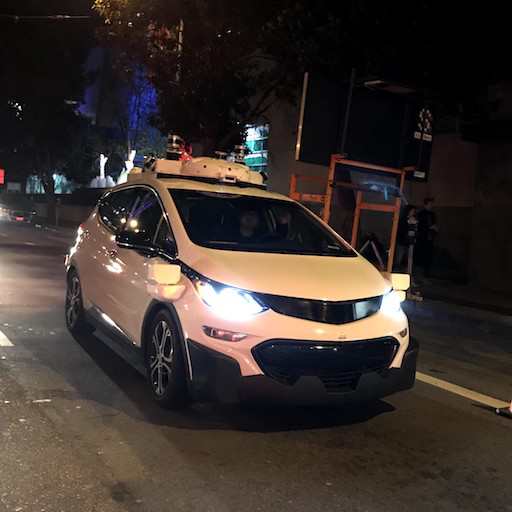

In [3]:
# This can be any image you like
#IMG_URL = 'http://s3.amazonaws.com/outcome-blog/wp-content/uploads/2017/02/25192225/cat.jpg'
IMG_URL = 'car.jpg'
img_pil = Image.open(IMG_URL)

# Image pre-processing transforms
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize
])
# Apply transforms
img_tensor = preprocess(img_pil)
# Add a batch dimension
img_tensor.unsqueeze_(0)
img_pil

In [12]:
# Initialize the pre-trained model
vgg19 = models.vgg19(pretrained=True)

In [11]:
# Initialize the pre-trained model
resnet50 = models.resnet50(pretrained=True)

In [9]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

# Download ImageNet labels and store them as a dict
labels = {int(key):value for (key, value)
          in requests.get(LABELS_URL).json().items()}


In [ ]:
for i in [resnet50, vgg19]:
    start = time.time()
    fc_out = i(Variable(img_tensor))
    result = fc_out.data.numpy().argmax()
    end = time.time()
    print("%s; %s; %.6f"%(namestr(i, globals()), labels[result], end-start))
   

['resnet50', 'i']; hook, claw; 0.697058
